# **KNN Regression Example**

In [1]:
from sklearn.datasets import (make_blobs, make_circles, make_moons)
import matplotlib.pyplot as plt
from pandas import DataFrame
import random
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy import stats


Generate and plot dataset (2 features, colour defined by value (target feature)).

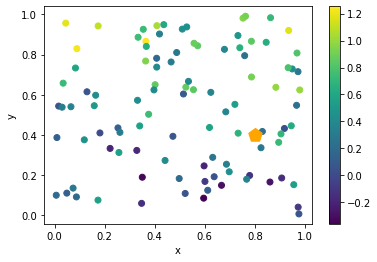

In [53]:
# to replicate data, seed is predefined
np.random.seed(4)
# generate 2d classification dataset

X = np.random.rand(100, 2)

shape_X = np.shape(X)
value = ((X[:,0]-0.5)**2+X[:,1]**2+(np.random.rand(1, shape_X[0])-0.5))[0]
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=value))
colors = {0:'red', 1:'blue', 2:'green',3:'cyan', 4:'orange'}
grouped = df.groupby('label')
ax = plt.subplot()
plt.scatter(X[:,0], X[:,1], c = value)
plt.colorbar()
# query example 
XQ = np.array([[0.8, 0.4]])
query = DataFrame(dict(x=XQ[:,0], y=XQ[:,1]))
query.plot(ax = ax, kind='scatter', x='x', y='y',  color='orange', marker = 'p',s=200);


**KNN algorithm for classification**

Input: data,  K (number of nearest neighbors to consider), query example
1. for each example in data: 
  1. calculate distance (usually Euclidean) to query example
  2. store the distance and index of example in a collection
2. sort the collect with respect to distances
3. select K examples with the smallest distances
4. return mean of values in the selected sample of K examples





In [54]:
# number of neighbors
K = 3


In [55]:
# calculate distance for each record in data and query 
distances_indices = []
for i in range(np.shape(df)[0]):
    # use  Euclidean distance
    distance = np.linalg.norm(X[i,:] - XQ)
    distances_indices.append((distance, i))

sorted_distances_indices = sorted(distances_indices)
k_nearest_distances_indices = sorted_distances_indices[:K]
# print k most similar records
indices = list(zip(*k_nearest_distances_indices))[1]

df_nearest = df.loc[indices,:]
print("Nearest values:")
print(df_nearest.head(K))
print("  ")
mode_label = stats.mode(df_nearest.iloc[:,-1]).mode[0]
print("Predicted value: {0:8.2f}".format(np.mean(df_nearest.iloc[:,-1])) )


Nearest values:
           x         y     label
29  0.830188  0.416776  0.219750
14  0.733380  0.408444  0.675512
95  0.824821  0.335849  0.290128
  
Predicted value:     0.40


In [56]:
distances = list(zip(*distances_indices))[0]
print(distances)

(0.22265736529088076, 0.35906684342843376, 0.2104339966691129, 0.4314247272965514, 0.5481229301814033, 0.2033627127899008, 0.5867916988675561, 0.6660610927303099, 0.7911278810236941, 0.9386993898427655, 0.6586086439897011, 0.46649033858486616, 0.706101982643533, 0.305843702914321, 0.0671528171798214, 0.6025087686045284, 0.40324204896435367, 0.6579977242720011, 0.3638842387305594, 0.4703280493139644, 0.46111607385468995, 0.22341658088177352, 0.4366336639163271, 0.18507835095046704, 0.33278510922447885, 0.1024711111015155, 0.26435262002742704, 0.3723686334160331, 0.12258543217043678, 0.034536443171835525, 0.10477875192732566, 0.4994287764865675, 0.46324865988381175, 0.3757414604103807, 0.25492231110398, 0.4992229403419008, 0.3504494401495774, 0.7481619144812824, 0.7042922591058122, 0.5706548794577195, 0.8055473100317432, 0.1630830613068421, 0.499022604372003, 0.5154864004074292, 0.6011600810530078, 0.2843350474496737, 0.6376207410691835, 0.49674291313346414, 0.3274582700883901, 0.1847650